# Unit 3.3 Assignment Unsupervised Machine Learning 

## Peer Members: 

• Syed Muhammad Raqim Ali Shah (2303.KHI.DEG.008) 

• Maaz Javaid Siddique (2303.KHI.DEG.004) 

## Solution

In [134]:
#First imported the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [135]:
iris = datasets.load_iris() # Load the Iris dataset

In [136]:
# Extract the features and target variable from the dataset
x = iris.data
y = iris.target

# K-means

In [137]:
# Import the KMeans class from the scikit-learn cluster module

from sklearn.cluster import KMeans

In [138]:
# Perform k-means clustering on the original dataset
# Create an instance of the KMeans class with specified hyperparameters
model = KMeans(n_clusters=3, n_init=1, max_iter=100)
model.fit(x)# Fit the KMeans model to the data

all_predictions = model.predict(x) # Use the trained model to make predictions on the data

centroids = model.cluster_centers_ # Get the coordinates of the cluster centers


In [139]:
centroids

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

<function matplotlib.pyplot.show(close=None, block=None)>

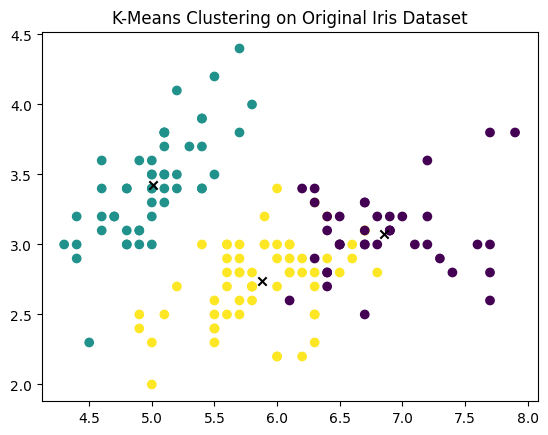

In [140]:
# Visualize the clustering results using a scatter plot
plt.scatter(x[:,0], x[:,1], c=all_predictions)
# Add the cluster centroids to the scatter plot
plt.scatter(centroids[:,0], centroids[:,1], marker='x', color="black")
plt.title('K-Means Clustering on Original Iris Dataset')
plt.show

# K-means with Reduced dataset with PCA

### PCA

In [122]:
# Import the PCA class from the scikit-learn library

from sklearn.decomposition import PCA

In [123]:
iris = datasets.load_iris() # Load the Iris dataset

In [124]:
x.shape

(150, 4)

In [125]:
# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the PCA object to the Iris dataset and transform the data to the new feature space

x_reduced = pca.fit_transform(x)

x_reduced.shape

(150, 2)

----------------------------------

Now performing KMeans Clustering on Reduced data with PCA

In [126]:
from sklearn.cluster import KMeans

In [127]:
model = KMeans(n_clusters=3, n_init=1, max_iter=100)
model.fit(x_reduced)

all_predictions = model.predict(x_reduced)
centroids = model.cluster_centers_

In [128]:
centroids

array([[ 2.34652659,  0.27393856],
       [-2.64241546,  0.19088505],
       [ 0.66567601, -0.3316042 ]])

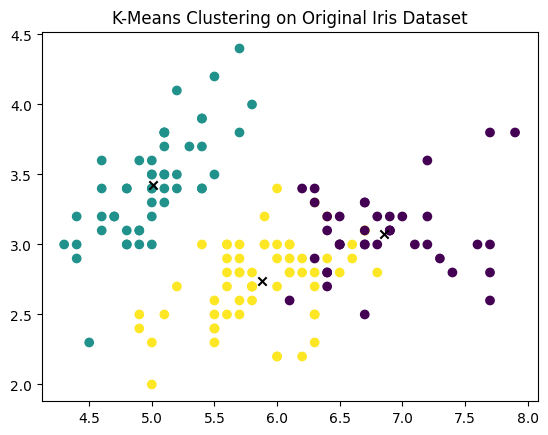

In [141]:
# Visualize the clustering results using a scatter plot
plt.scatter(x[:,0], x[:,1], c=all_predictions)
# Add the cluster centroids to the scatter plot
plt.scatter(centroids[:,0], centroids[:,1], marker='x', color="black")
plt.title('K-Means Clustering on Original Iris Dataset')
plt.show()


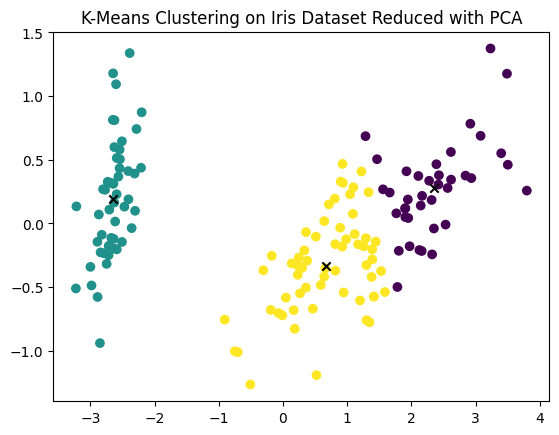

In [132]:

plt.scatter(x_reduced[:,0], x_reduced[:,1], c=all_predictions)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', color="black")
plt.title('K-Means Clustering on Iris Dataset Reduced with PCA')
plt.show()

